# Predicting Clicks Based On Advertisment Data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv("./advertising_data.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
# Note => "Ad topic line" can be filtered as a set of different keywords that word or don't work
# Note (Continued) => You can import a language model and make it classify the tone and make that a feature
df.drop(['Ad Topic Line', 'City'], axis = 1, inplace = True) 

## Exploring Data

In [5]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
# Quantative Info
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
# Impact Of Gender On Clicking (Females are more likely to click)
print(f"Ration of Men : Women In Clicking => {len(df.loc[(df['Male'] == 1) & (df['Clicked on Ad'] == 1)])}:{len(df.index) - len(df.loc[(df['Male'] == 1) & (df['Clicked on Ad'] == 1)])}")

Ration of Men : Women In Clicking => 231:769


<AxesSubplot: >

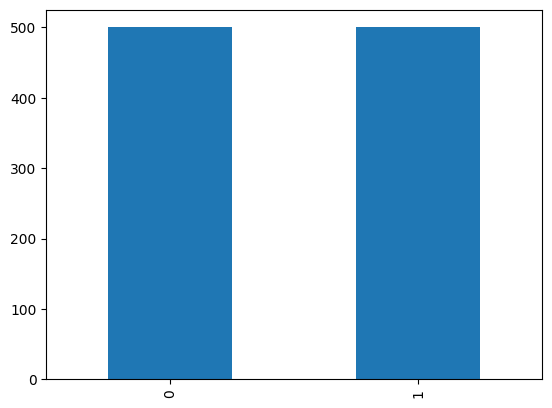

In [8]:
# Equal Data On Clicks & Not Clicks (Good - No Bias)
df['Clicked on Ad'].value_counts().plot(kind='bar')

## Feature Engineering

In [9]:
# Filtering Timestamp Into Categories (Maybe there is a relationship between time of day and clicking)

# Splitting Day-time to just time
for i in range(len(df.index)):
    df["Timestamp"][i] = df["Timestamp"][i].split(' ')[1]

# Classifying into major periods
for i in range(len(df.index)):
    time_tmp = df["Timestamp"][i]
    if  time_tmp >= '06:00:00' and time_tmp < '11:59:00':
            df["Timestamp"][i] = "Morning"
    elif time_tmp == '12:00:00':
        df["Timestamp"][i] = "Noon"
    elif time_tmp >= '12:01:00' and time_tmp < '17:00:00':
        df["Timestamp"][i] = "Afternoon"
    elif time_tmp >= '17:01:00' and time_tmp < '20:00:00':
        df["Timestamp"][i] = "Afternoon"
    else:
        df["Timestamp"][i] = "Night"

/tmp/ipykernel_114675/2546497096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"][i] = df["Timestamp"][i].split(' ')[1]
/tmp/ipykernel_114675/2546497096.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"][i] = "Night"
/tmp/ipykernel_114675/2546497096.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"][i] = "Afternoon"
/tmp/ipykernel_114675/2546497096.py:11: SettingWithCopyWarning: 
A

## Fitting Data & Training Model

In [10]:
# Categorical Variables => Numeric Variable
encoder = LabelEncoder()

catCols = [col for col in df.columns if df[col].dtype == "O"]
for item in catCols:
    df[item] = encoder.fit_transform(df[item])

# Printing To See Final DF
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,215,2,0
1,80.23,31,68441.85,193.77,1,147,2,0
2,69.47,26,59785.94,236.50,0,184,2,0
3,74.15,29,54806.18,245.89,1,103,2,0
4,68.37,35,73889.99,225.58,0,96,2,0
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,116,2,1
996,51.30,45,67782.17,134.42,1,26,2,1
997,51.63,51,42415.72,120.37,1,140,0,1
998,55.55,19,41920.79,187.95,0,85,2,0


In [11]:
# Preparing & Fitting Data
X = df[df.columns.drop('Clicked on Ad')]
y = df["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Training Model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

## Accuracy

In [12]:
score = clf.score(X_test, y_test)
print(f"Accuracy: {round(score*100, 2)}%")

Accuracy: 88.67%
